In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import requests
from io import StringIO


## Dataset 1: Predict students' dropout and academic success

In [53]:
# Specify the shared Dropbox link to the CSV file
dropbox_link = "https://www.dropbox.com/scl/fi/ioxdslevrm8ja6g5x6zg5/predict-students-dropout-and-academic-success.csv?rlkey=nqppfzudim56j4r3h4b0dvrxc&dl=0"

# Extract the direct download link from the shared link
direct_download_link = dropbox_link.replace("www.dropbox.com", "dl.dropboxusercontent.com")

# Fetch the CSV file content from the direct download link
response = requests.get(direct_download_link)

# Check if the request was successful
if response.status_code == 200:
    # Create a StringIO object to simulate a file-like object
    csv_data = StringIO(response.text)

    # Read the CSV data into a DataFrame
    dropout_rate = pd.read_csv(csv_data, delimiter=';')

    print(dropout_rate.head())
else:
    print("Failed to fetch the CSV file.")




   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [54]:
X1 = dropout_rate.drop('Target', axis=1)  # Assuming 'GRADE' is the target
y1 = dropout_rate['Target']

# Splitting the dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.8, random_state=42)

## Dataset 2: Higher Education Students Performance Evaluation

In [55]:
# Specify the shared Dropbox link to the CSV file
dropbox_link = "https://www.dropbox.com/scl/fi/j8nzdqufcbi1a4vm7wmdj/higher-education-students-performance-evaluation.csv?rlkey=x273afhh2lcttcbgmzlrvcvt0&dl=0"

# Extract the direct download link from the shared link
direct_download_link = dropbox_link.replace("www.dropbox.com", "dl.dropboxusercontent.com")

# Fetch the CSV file content from the direct download link
response = requests.get(direct_download_link)

# Check if the request was successful
if response.status_code == 200:
    # Create a StringIO object to simulate a file-like object
    csv_data = StringIO(response.text)

    # Read the CSV data into a DataFrame
    higherEd_Performance = pd.read_csv(csv_data)

    print(higherEd_Performance.head())
else:
    print("Failed to fetch the CSV file.")

higherEd_Performance = higherEd_Performance.drop(columns=['STUDENT ID'])



  STUDENT ID  1  2  3  4  5  6  7  8  9  ...  23  24  25  26  27  28  29  30  \
0   STUDENT1  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   1   2   1   1   
1   STUDENT2  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   3   2   2   3   
2   STUDENT3  2  2  2  3  2  2  2  2  4  ...   1   1   2   2   1   1   2   2   
3   STUDENT4  1  1  1  3  1  2  1  2  1  ...   1   2   3   2   2   1   3   2   
4   STUDENT5  2  2  1  3  2  2  1  3  1  ...   2   1   2   2   2   1   2   2   

   COURSE ID  GRADE  
0          1      1  
1          1      1  
2          1      1  
3          1      1  
4          1      1  

[5 rows x 33 columns]


In [56]:
X2 = higherEd_Performance.drop('GRADE', axis=1)  # Assuming 'GRADE' is the target
y2 = higherEd_Performance['GRADE']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.8, random_state=42)

## Dataset 3: Student Interaction with Virtual Learning Environment

In [57]:
# Specify the shared Dropbox link to the CSV file
dropbox_link = "https://www.dropbox.com/scl/fi/bv4l9ke6lu62i51voxun8/studentVle.csv?rlkey=8gyvggbnwumri1gdo5e9c8dzy&dl=0"

# Extract the direct download link from the shared link
direct_download_link = dropbox_link.replace("www.dropbox.com", "dl.dropboxusercontent.com")

# Fetch the CSV file content from the direct download link
response = requests.get(direct_download_link)

# Check if the request was successful
if response.status_code == 200:
    # Create a StringIO object to simulate a file-like object
    csv_data = StringIO(response.text)

    # Read the CSV data into a DataFrame using a semicolon (;) as the delimiter
    student_interactions = pd.read_csv(csv_data, delimiter=',', nrows=20000)

    print(student_interactions.head())
else:
    print("Failed to fetch the CSV file.")


student_interactions = student_interactions.drop(columns=['code_module', 'code_presentation'])

  code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
1         AAA             2013J       28400   546652   -10          1
2         AAA             2013J       28400   546652   -10          1
3         AAA             2013J       28400   546614   -10         11
4         AAA             2013J       28400   546714   -10          1


In [58]:
# 'sum_click' is the target variable
X3 = student_interactions.drop('sum_click', axis=1)
y3 = student_interactions['sum_click']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.8, random_state=42)

# Random Forest Classifier

In [59]:
def train_evaluate_rf(dataset):
    X_train, X_test, y_train, y_test = train_test_split(dataset.drop('target', axis=1), dataset['target'], test_size=0.2, random_state=42)
    rf_clf = RandomForestClassifier(random_state=42)
    rf_clf.fit(X_train, y_train)
    predictions = rf_clf.predict(X_test)
    return accuracy_score(y_test, predictions)


In [60]:
accuracy_rf_dataset1 = train_evaluate_rf(dropout_rate.rename(columns={'Target': 'target'}))
print(f"Random Forest Accuracy on Dataset 1: {accuracy_rf_dataset1}")

Random Forest Accuracy on Dataset 1: 0.7604519774011299


In [61]:

accuracy_rf_dataset2 = train_evaluate_rf(higherEd_Performance.rename(columns={'GRADE': 'target'}))
print(f"Random Forest Accuracy on Dataset 2: {accuracy_rf_dataset2}")


Random Forest Accuracy on Dataset 2: 0.1724137931034483


In [62]:
# Split the data and train the model
accuracy_rf_dataset3 = train_evaluate_rf(student_interactions.rename(columns={'sum_click': 'target'}))
print(f"Random Forest Accuracy on Dataset 3: {accuracy_rf_dataset3}")

Random Forest Accuracy on Dataset 3: 0.2895


# Decision Tree Classifier

In [63]:
def train_evaluate_dt(dataset):
    X_train, X_test, y_train, y_test = train_test_split(dataset.drop('target', axis=1), dataset['target'], test_size=0.2, random_state=42)
    dt_clf = DecisionTreeClassifier(random_state=42)
    dt_clf.fit(X_train, y_train)
    predictions = dt_clf.predict(X_test)
    return accuracy_score(y_test, predictions)


In [64]:
accuracy_dt_dataset1 = train_evaluate_dt(dropout_rate.rename(columns={'Target': 'target'}))
print(f"Decision Tree Accuracy on Dataset 1: {accuracy_dt_dataset1}")

Decision Tree Accuracy on Dataset 1: 0.6768361581920904


In [65]:
accuracy_dt_dataset2 = train_evaluate_dt(higherEd_Performance.rename(columns={'GRADE': 'target'}))
print(f"Decision Tree Accuracy on Dataset 2: {accuracy_dt_dataset2}")

Decision Tree Accuracy on Dataset 2: 0.20689655172413793


In [66]:
# Split the data and train the model
accuracy_rf_dataset3 = train_evaluate_dt(student_interactions.rename(columns={'sum_click': 'target'}))
print(f"Random Forest Accuracy on Dataset 3: {accuracy_rf_dataset3}")

Random Forest Accuracy on Dataset 3: 0.271


# Bagging Classifier

In [67]:
def train_evaluate_bagging(dataset):
    X_train, X_test, y_train, y_test = train_test_split(dataset.drop('target', axis=1), dataset['target'], test_size=0.2, random_state=42)
    bg_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
    bg_clf.fit(X_train, y_train)
    predictions = bg_clf.predict(X_test)
    return accuracy_score(y_test, predictions)


In [68]:
accuracy_bg_dataset1 = train_evaluate_bagging(dropout_rate.rename(columns={'Target': 'target'}))
print(f"Bagging Accuracy on Dataset 1: {accuracy_dt_dataset1}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy on Dataset 1: 0.6768361581920904


In [69]:
accuracy_bg_dataset2 = train_evaluate_bagging(higherEd_Performance.rename(columns={'GRADE': 'target'}))
print(f"Bagging Accuracy on Dataset 2: {accuracy_bg_dataset2}")


Bagging Accuracy on Dataset 2: 0.1724137931034483


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [70]:
accuracy_bg_dataset3 = train_evaluate_bagging(student_interactions.rename(columns={'sum_click': 'target'}))
print(f"Bagging Accuracy on Dataset 3: {accuracy_bg_dataset3}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy on Dataset 3: 0.29625


# Hyperparameter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV


## Random Forest

In [72]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Dataset 1
grid_search_rf1 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf1.fit(X1_train, y1_train)  # Replace X1_train, y1_train with your dataset 1 train data
print("Best Parameters for Random Forest on Dataset 1:", grid_search_rf1.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters for Random Forest on Dataset 1: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [73]:
# Proceed with GridSearchCV for Random Forest
grid_search_rf2 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf2.fit(X2_train, y2_train)
print("Best Parameters for Random Forest on Dataset 2:", grid_search_rf2.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters for Random Forest on Dataset 2: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [74]:
# Dataset 3
grid_search_rf3 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf3.fit(X3_train, y3_train)
print("Best Parameters for Random Forest on Dataset 3:", grid_search_rf3.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters for Random Forest on Dataset 3: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


### Crossvalidation for Random Forest

In [75]:
# Cross-validation for Random Forest on Dataset 1
best_rf1 = grid_search_rf1.best_estimator_
cross_val_scores_rf1 = cross_val_score(best_rf1, X1, y1, cv=5)
print("Cross-Validation Scores for Random Forest on Dataset 1:", cross_val_scores_rf1)


Cross-Validation Scores for Random Forest on Dataset 1: [0.77288136 0.78418079 0.78983051 0.75932203 0.75791855]


In [76]:
# Cross-validation for Random Forest on Dataset 2
best_rf2 = grid_search_rf2.best_estimator_
cross_val_scores_rf2 = cross_val_score(best_rf2, X2, y2, cv=5)
print("Cross-Validation Scores for Random Forest on Dataset 2:", cross_val_scores_rf2)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Cross-Validation Scores for Random Forest on Dataset 2: [0.34482759 0.24137931 0.31034483 0.20689655 0.27586207]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [77]:
# Cross-validation for Random Forest on Dataset 3
best_rf3 = grid_search_rf3.best_estimator_
cross_val_scores_rf3 = cross_val_score(best_rf3, X3, y3, cv=5)
print("Cross-Validation Scores for Random Forest on Dataset 3:", cross_val_scores_rf3)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'`

Cross-Validation Scores for Random Forest on Dataset 3: [0.315   0.2085  0.15425 0.239   0.14075]


## Decision Tree

In [78]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Dataset 1
grid_search_dt1 = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2)
grid_search_dt1.fit(X1_train, y1_train)  # Replace X1_train, y1_train with your dataset 1 train data
print("Best Parameters for Decision Tree on Dataset 1:", grid_search_dt1.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Decision Tree on Dataset 1: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [79]:
# Dataset 2
grid_search_dt2 = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2)
grid_search_dt2.fit(X2_train, y2_train)
print("Best Parameters for Decision Tree on Dataset 2:", grid_search_dt2.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Decision Tree on Dataset 2: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [80]:
# Dataset 3
grid_search_dt3 = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_dt, cv=5, n_jobs=-1, verbose=2)
grid_search_dt3.fit(X3_train, y3_train)
print("Best Parameters for Decision Tree on Dataset 3:", grid_search_dt3.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters for Decision Tree on Dataset 3: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}


### Cross-validation with a Decision Tree

In [81]:
# Cross-validation for Decision Tree on Dataset 1
best_dt1 = grid_search_dt1.best_estimator_
cross_val_scores_dt1 = cross_val_score(best_dt1, X1, y1, cv=5)
print("Cross-Validation Scores for Decision Tree on Dataset 1:", cross_val_scores_dt1)


Cross-Validation Scores for Decision Tree on Dataset 1: [0.72429379 0.73672316 0.71525424 0.71412429 0.72171946]


In [82]:
# Cross-validation for Decision Tree on Dataset 2
best_dt2 = grid_search_dt2.best_estimator_
cross_val_scores_dt2 = cross_val_score(best_dt1, X2, y2, cv=5)
print("Cross-Validation Scores for Decision Tree on Dataset 2:", cross_val_scores_dt2)

Cross-Validation Scores for Decision Tree on Dataset 2: [0.20689655 0.27586207 0.20689655 0.24137931 0.24137931]


In [83]:
# Cross-validation for Decision Tree on Dataset 3
best_dt3 = grid_search_dt3.best_estimator_
cross_val_scores_dt3 = cross_val_score(best_dt3, X3, y3, cv=5)
print("Cross-Validation Scores for Decision Tree on Dataset 3:", cross_val_scores_dt3)

Cross-Validation Scores for Decision Tree on Dataset 3: [0.3395  0.179   0.2355  0.2405  0.19725]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


## Bagging Classifier

In [84]:
from sklearn.ensemble import BaggingClassifier

# Define the parameter grid for Bagging Classifier
param_grid_bagging = {
    'base_estimator': [None],  # You can specify a base estimator here if needed
    'n_estimators': [100, 200],
    'max_samples': [1.0, 0.8],  # Adjust this based on your requirements
    'max_features': [1.0, 0.8],  # Adjust this based on your requirements
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Dataset 1
grid_search_bagging1 = GridSearchCV(estimator=BaggingClassifier(), param_grid=param_grid_bagging, cv=5, n_jobs=-1, verbose=2)
grid_search_bagging1.fit(X1_train, y1_train)  # Replace X1_train, y1_train with your dataset 1 train data
print("Best Parameters for Bagging Classifier on Dataset 1:", grid_search_bagging1.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters for Bagging Classifier on Dataset 1: {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 200}


In [85]:
# Dataset 2
grid_search_bagging2 = GridSearchCV(estimator=BaggingClassifier(), param_grid=param_grid_bagging, cv=5, n_jobs=-1, verbose=2)
grid_search_bagging2.fit(X2_train, y2_train)
print("Best Parameters for Bagging Classifier on Dataset 2:", grid_search_bagging2.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters for Bagging Classifier on Dataset 2: {'base_estimator': None, 'bootstrap': False, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 100}


In [86]:
# Dataset 3
grid_search_bagging3 = GridSearchCV(estimator=BaggingClassifier(), param_grid=param_grid_bagging, cv=5, n_jobs=-1, verbose=2)
grid_search_bagging3.fit(X3_train, y3_train)
print("Best Parameters for Bagging Classifier on Dataset 3:", grid_search_bagging3.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters for Bagging Classifier on Dataset 3: {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 200}


### Cross-Validation for Bagging Classifier

In [87]:
# Cross-validation for Bagging Classifier on Dataset 1
best_bagging1 = grid_search_bagging1.best_estimator_
cross_val_scores_bagging1 = cross_val_score(best_bagging1, X1, y1, cv=5)  # Replace X1, y1 with your full dataset 1
print("Cross-Validation Scores for Bagging Classifier on Dataset 1:", cross_val_scores_bagging1)


Cross-Validation Scores for Bagging Classifier on Dataset 1: [0.77175141 0.77514124 0.77514124 0.77175141 0.75904977]


In [88]:
# Cross-validation for Bagging Classifier on Dataset 2
best_bagging2 = grid_search_bagging2.best_estimator_
cross_val_scores_bagging2 = cross_val_score(best_bagging2, X2, y2, cv=5)
print("Cross-Validation Scores for Bagging Classifier on Dataset 2:", cross_val_scores_bagging2)


Cross-Validation Scores for Bagging Classifier on Dataset 2: [0.31034483 0.31034483 0.34482759 0.27586207 0.31034483]


In [89]:
# Cross-validation for Bagging Classifier on Dataset 3
best_bagging3 = grid_search_bagging3.best_estimator_
cross_val_scores_bagging3 = cross_val_score(best_bagging3, X3, y3, cv=5)
print("Cross-Validation Scores for Bagging Classifier on Dataset 3:", cross_val_scores_bagging3)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores for Bagging Classifier on Dataset 3: [0.34775 0.20925 0.24575 0.276   0.19825]


# In depth Analysis

## Random Forest

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


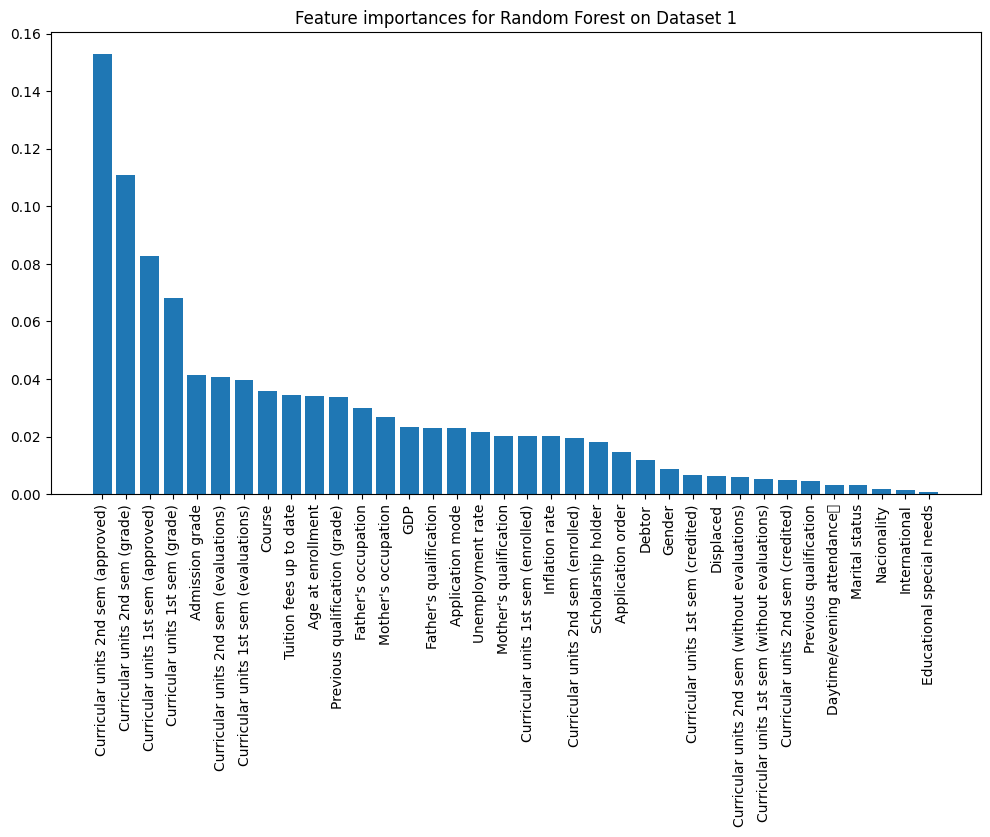

In [90]:
# Feature importance for Random Forest on Dataset 1
feature_importances_rf1 = best_rf1.feature_importances_
indices_rf1 = np.argsort(feature_importances_rf1)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature importances for Random Forest on Dataset 1")
plt.bar(range(X1_train.shape[1]), feature_importances_rf1[indices_rf1], align="center")
plt.xticks(range(X1_train.shape[1]), X1_train.columns[indices_rf1], rotation=90)
plt.show()

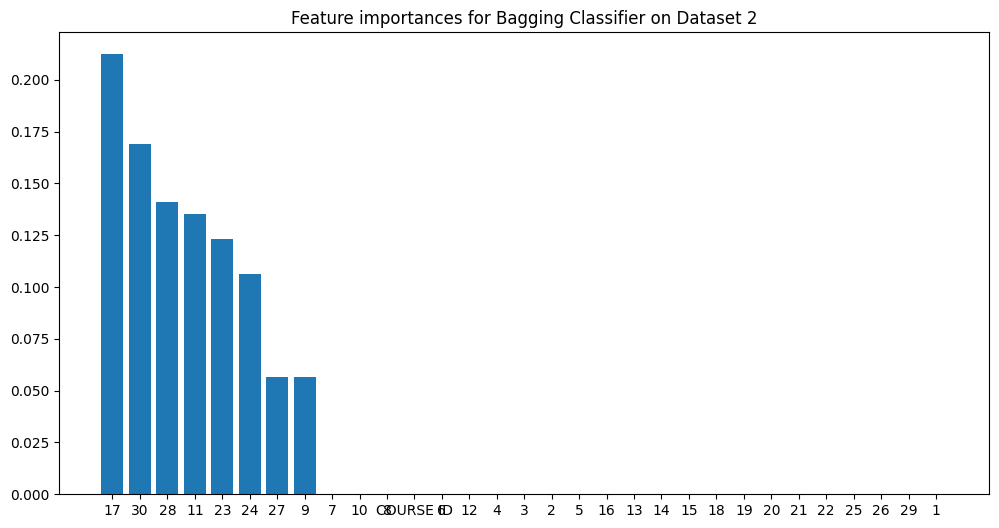

In [91]:
# Feature importance for Bagging Classifier on Dataset 2
feature_importances_bagging2 = best_bagging2.estimators_[0].feature_importances_  # Adjust the index if needed
indices_bagging2 = np.argsort(feature_importances_bagging2)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature importances for Bagging Classifier on Dataset 2")

# Use the correct number of features for the range and x-axis labels
num_features = len(indices_bagging2)
plt.bar(range(num_features), feature_importances_bagging2[indices_bagging2], align="center")
plt.xticks(range(num_features), [X2_train.columns[i] for i in indices_bagging2])

plt.show()


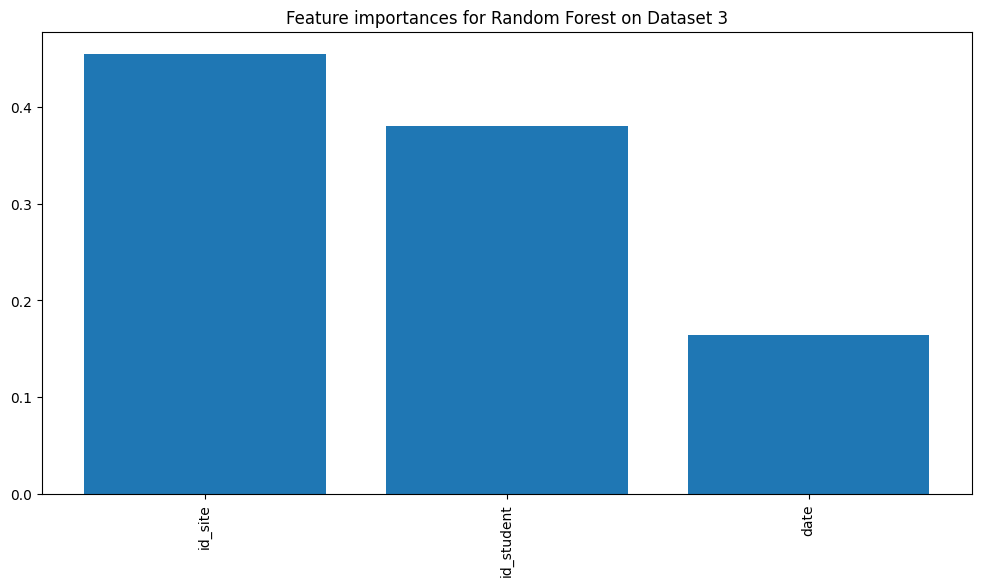

In [92]:
# Feature importance for Random Forest on Dataset 3
feature_importances_rf3 = best_rf3.feature_importances_
indices_rf3 = np.argsort(feature_importances_rf3)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature importances for Random Forest on Dataset 3")
plt.bar(range(X3_train.shape[1]), feature_importances_rf3[indices_rf3], align="center")
plt.xticks(range(X3_train.shape[1]), [X3_train.columns[i] for i in indices_rf3], rotation=90)
plt.show()


## Decision Tree

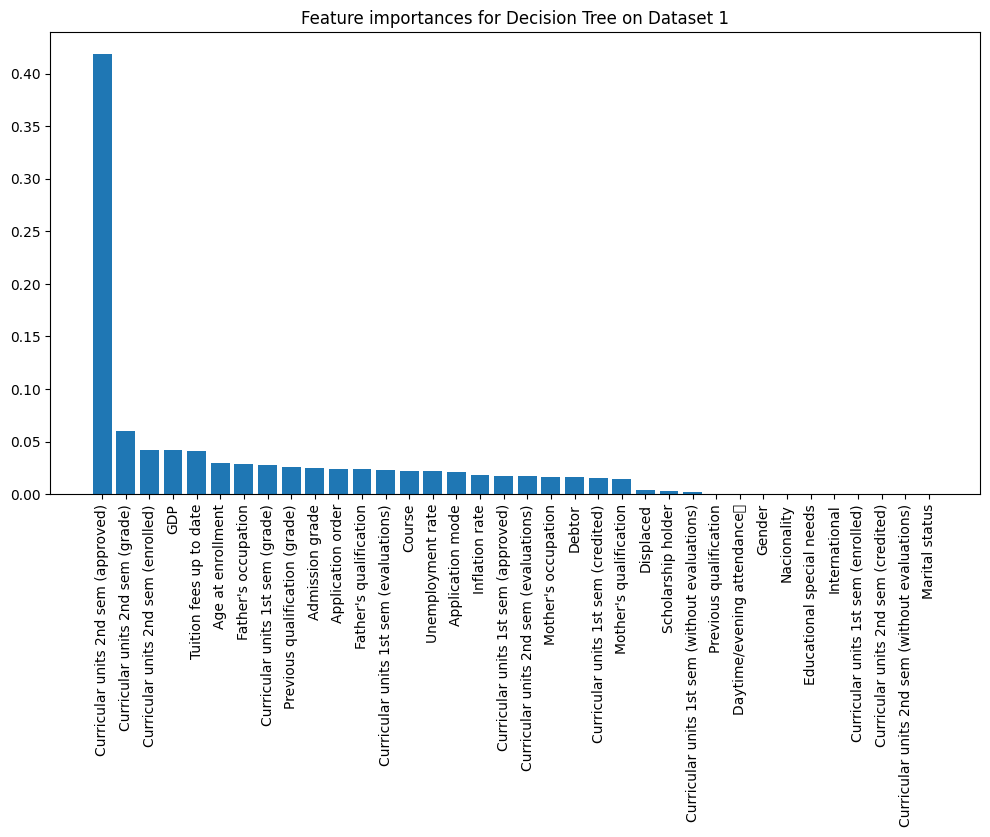

In [93]:
# Feature importance for Decision Tree on Dataset 1
feature_importances_dt1 = best_dt1.feature_importances_
indices_dt1 = np.argsort(feature_importances_dt1)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature importances for Decision Tree on Dataset 1")
plt.bar(range(X1_train.shape[1]), feature_importances_dt1[indices_dt1], align="center")
plt.xticks(range(X1_train.shape[1]), X1_train.columns[indices_dt1], rotation=90)
plt.show()

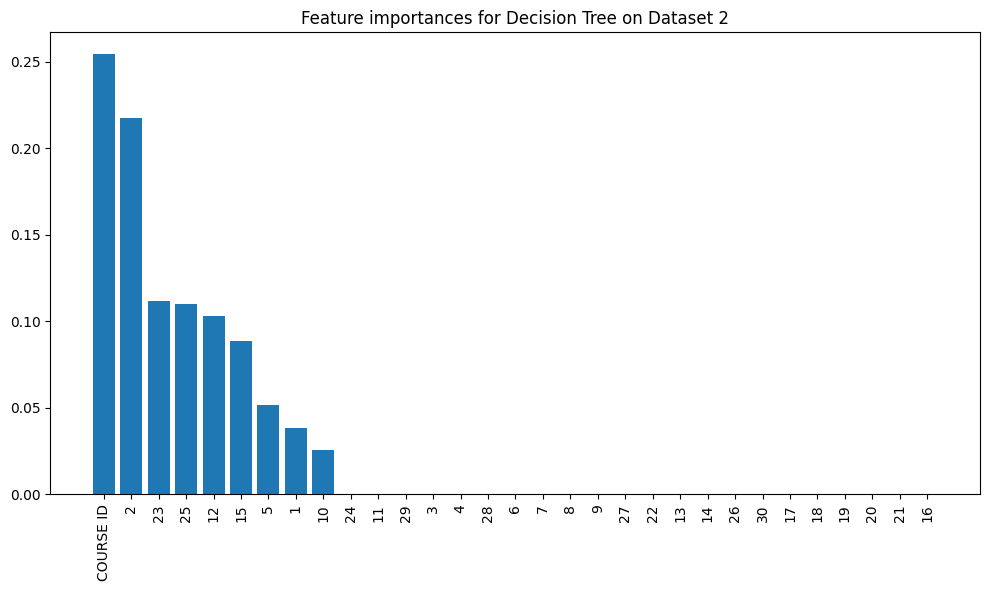

In [94]:
# Feature importance for Decision Tree on Dataset 2
feature_importances_dt2 = best_dt2.feature_importances_
indices_dt2 = np.argsort(feature_importances_dt2)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature importances for Decision Tree on Dataset 2")
plt.bar(range(X2_train.shape[1]), feature_importances_dt2[indices_dt2], align="center")
plt.xticks(range(X2_train.shape[1]), X2_train.columns[indices_dt2], rotation=90)
plt.show()


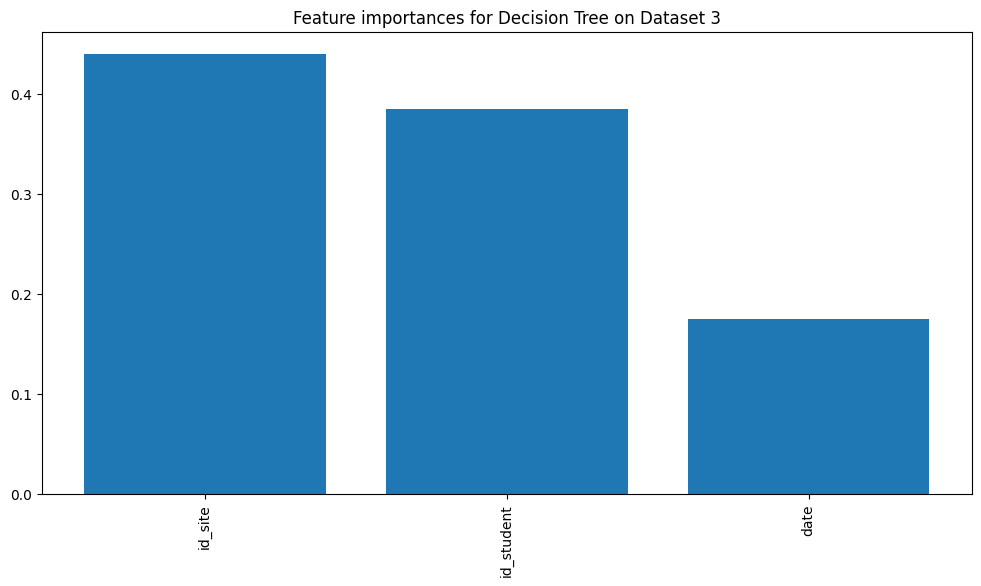

In [95]:
# Feature importance for Decision Tree on Dataset 3
feature_importances_dt3 = best_dt3.feature_importances_
indices_dt3 = np.argsort(feature_importances_dt3)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature importances for Decision Tree on Dataset 3")
plt.bar(range(X3_train.shape[1]), feature_importances_dt3[indices_dt3], align="center")
plt.xticks(range(X3_train.shape[1]), X3_train.columns[indices_dt3], rotation=90)
plt.show()


## Bagging Classifier

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


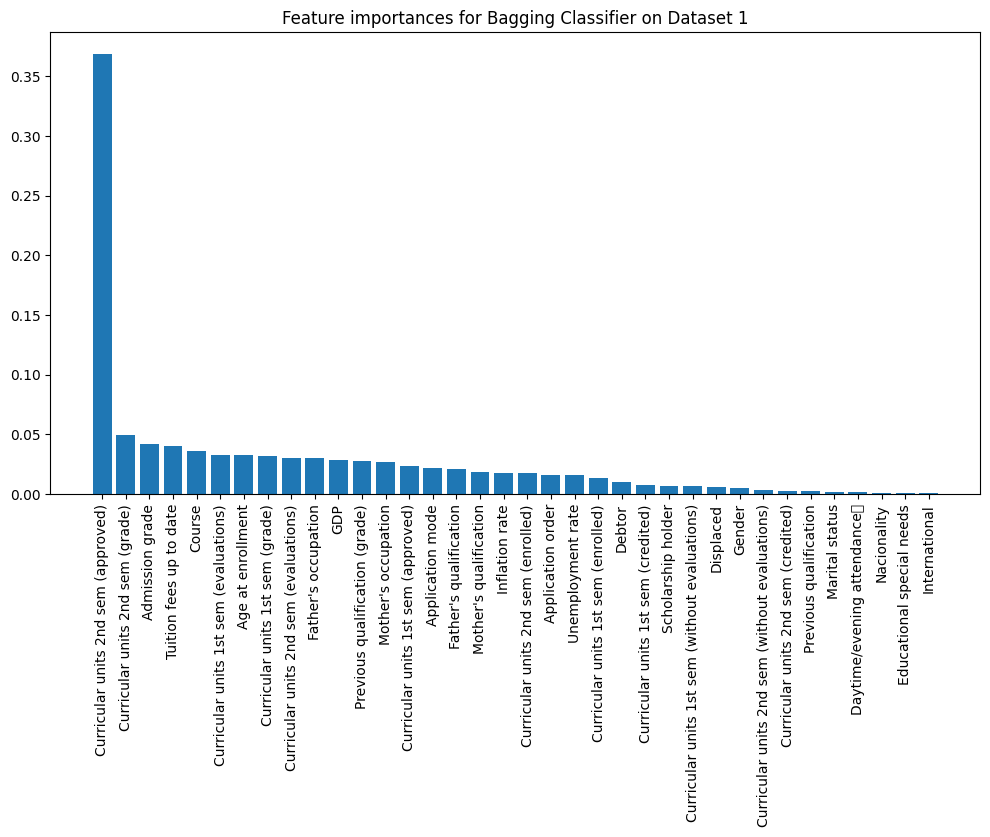

In [96]:
# Fit a Bagging Classifier with a base estimator (e.g., DecisionTreeClassifier)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier()  # You can use any base estimator you prefer
bagging_classifier = BaggingClassifier(base_estimator, n_estimators=100)  # Example parameters

bagging_classifier.fit(X1_train, y1_train)

# Compute feature importances by averaging over base estimators
feature_importances_bagging1 = np.mean([tree.feature_importances_ for tree in bagging_classifier.estimators_], axis=0)
indices_bagging1 = np.argsort(feature_importances_bagging1)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature importances for Bagging Classifier on Dataset 1")
plt.bar(range(X1_train.shape[1]), feature_importances_bagging1[indices_bagging1], align="center")
plt.xticks(range(X1_train.shape[1]), X1_train.columns[indices_bagging1], rotation=90)
plt.show()


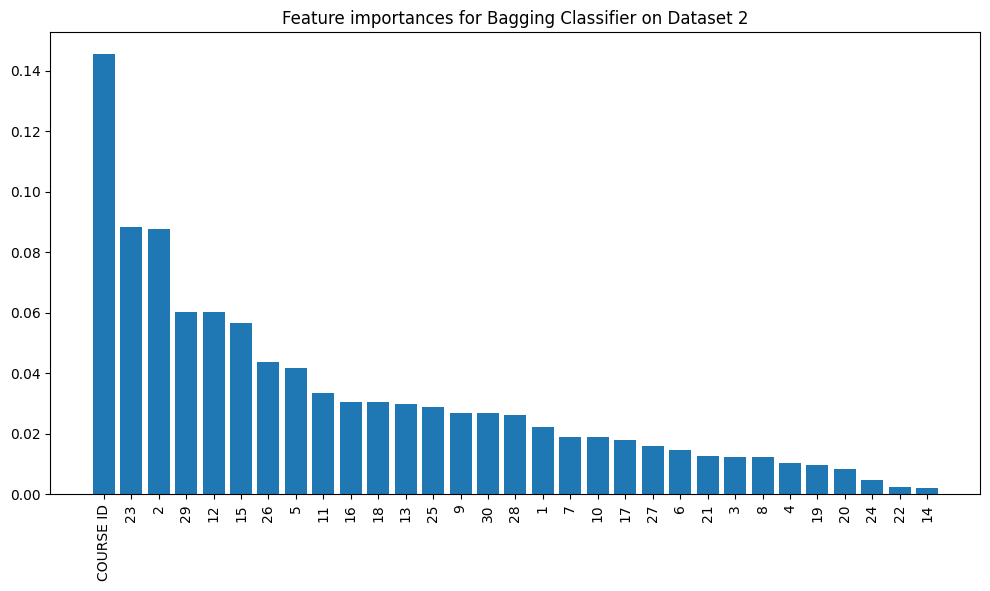

In [97]:
# Fit a Bagging Classifier with a base estimator (e.g., DecisionTreeClassifier)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier()  # You can use any base estimator you prefer
bagging_classifier = BaggingClassifier(base_estimator, n_estimators=100)  # Example parameters

bagging_classifier.fit(X2_train, y2_train)  # Replace with your Dataset 2 variables

# Compute feature importances by averaging over base estimators
feature_importances_bagging2 = np.mean([tree.feature_importances_ for tree in bagging_classifier.estimators_], axis=0)
indices_bagging2 = np.argsort(feature_importances_bagging2)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature importances for Bagging Classifier on Dataset 2")
plt.bar(range(X2_train.shape[1]), feature_importances_bagging2[indices_bagging2], align="center")
plt.xticks(range(X2_train.shape[1]), X2_train.columns[indices_bagging2], rotation=90)
plt.show()


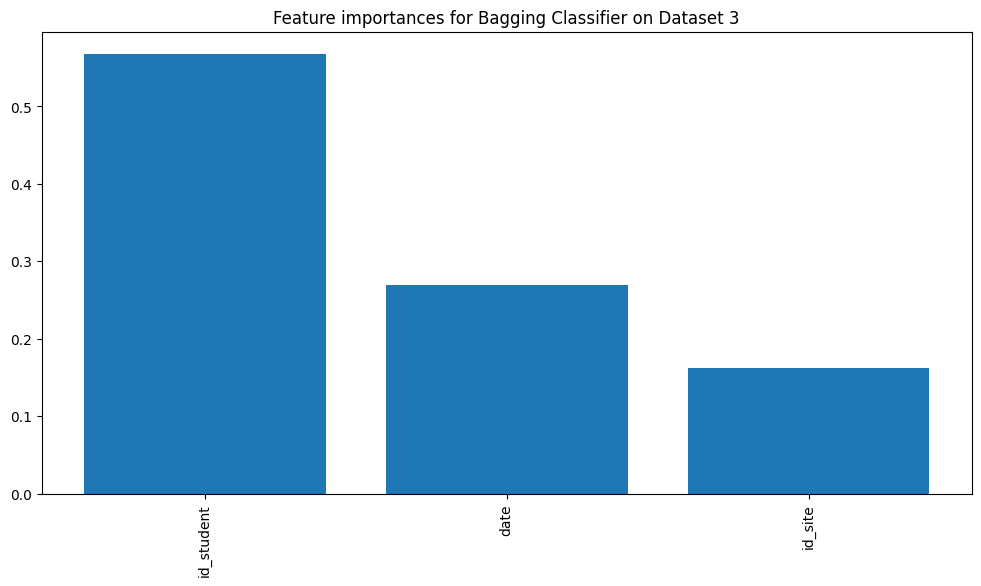

In [98]:
# Fit a Bagging Classifier with a base estimator (e.g., DecisionTreeClassifier)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier()  # You can use any base estimator you prefer
bagging_classifier = BaggingClassifier(base_estimator, n_estimators=100)  # Example parameters

bagging_classifier.fit(X3_train, y3_train)  # Replace with your Dataset 3 variables

# Compute feature importances by averaging over base estimators
feature_importances_bagging3 = np.mean([tree.feature_importances_ for tree in bagging_classifier.estimators_], axis=0)
indices_bagging3 = np.argsort(feature_importances_bagging3)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature importances for Bagging Classifier on Dataset 3")
plt.bar(range(X3_train.shape[1]), feature_importances_bagging3[indices_bagging3], align="center")
plt.xticks(range(X3_train.shape[1]), X3_train.columns[indices_bagging3], rotation=90)
plt.show()


# Comparative Analysis

               Dataset 1  Dataset 2  Dataset 3
Random Forest   0.772827   0.275862    0.21150
Decision Tree   0.722423   0.234483    0.23835
Bagging         0.770567   0.310345    0.25540


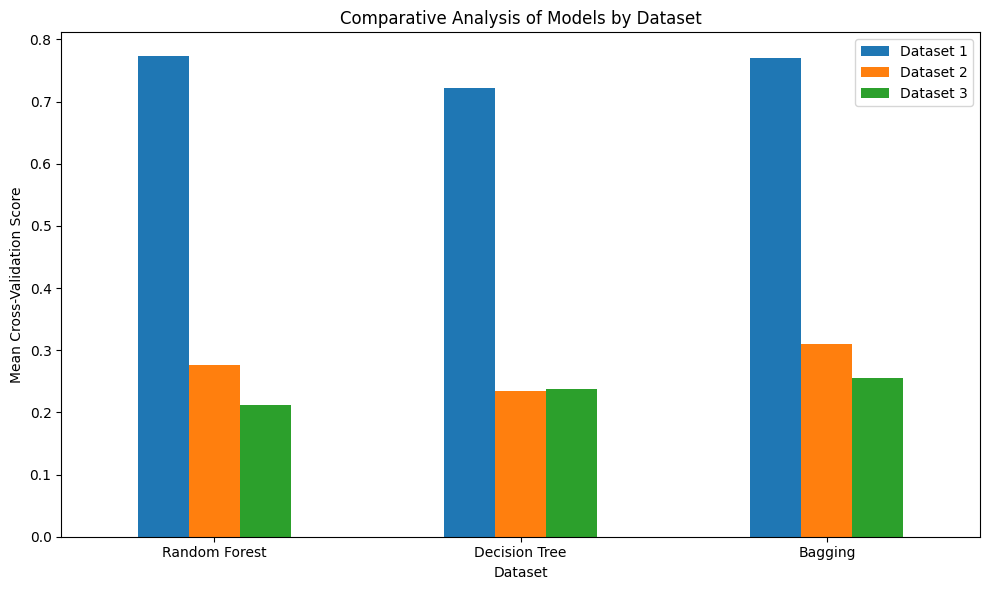

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Your results dictionary
results = {
    'Dataset 1': {
        'Random Forest': cross_val_scores_rf1.mean(),
        'Decision Tree': cross_val_scores_dt1.mean(),
        'Bagging': cross_val_scores_bagging1.mean()
    },
    'Dataset 2': {
        'Random Forest': cross_val_scores_rf2.mean(),
        'Decision Tree': cross_val_scores_dt2.mean(),
        'Bagging': cross_val_scores_bagging2.mean()
    },
    'Dataset 3': {
        'Random Forest': cross_val_scores_rf3.mean(),
        'Decision Tree': cross_val_scores_dt3.mean(),
        'Bagging': cross_val_scores_bagging3.mean()
    },
}

# Convert the results dictionary to a Pandas DataFrame
df = pd.DataFrame(results)

# Display the DataFrame as a table
print(df)

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(kind='bar', ax=ax)

# Customize the chart
ax.set_xlabel('Dataset')
ax.set_ylabel('Mean Cross-Validation Score')
ax.set_title('Comparative Analysis of Models by Dataset')
plt.xticks(rotation=0)  # Ensure x-axis labels are not rotated
plt.tight_layout()

# Show the chart
plt.show()


In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions from your model
# For example, for Random Forest
y_pred_rf = grid_search_rf1.predict(X1_test)  # Replace best_rf with your trained Random Forest model

# Accuracy
accuracy_rf = accuracy_score(y1_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Precision
precision_rf = precision_score(y1_test, y_pred_rf, average='weighted')  # Use 'binary' for binary classification
print("Random Forest Precision:", precision_rf)

# Recall
recall_rf = recall_score(y1_test, y_pred_rf, average='weighted')  # Use 'binary' for binary classification
print("Random Forest Recall:", recall_rf)

# F1 Score
f1_rf = f1_score(y1_test, y_pred_rf, average='weighted')  # Use 'binary' for binary classification
print("Random Forest F1 Score:", f1_rf)


Random Forest Accuracy: 0.7463276836158192
Random Forest Precision: 0.7183176912551956
Random Forest Recall: 0.7463276836158192
Random Forest F1 Score: 0.7171725516364037


In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions from your Decision Tree model
# For example, for Decision Tree
y_pred_dt = grid_search_dt1.predict(X1_test)  # Replace grid_search_dt1 with your trained Decision Tree model

# Accuracy
accuracy_dt = accuracy_score(y1_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

# Precision
precision_dt = precision_score(y1_test, y_pred_dt, average='weighted')  # Use 'binary' for binary classification
print("Decision Tree Precision:", precision_dt)

# Recall
recall_dt = recall_score(y1_test, y_pred_dt, average='weighted')  # Use 'binary' for binary classification
print("Decision Tree Recall:", recall_dt)

# F1 Score
f1_dt = f1_score(y1_test, y_pred_dt, average='weighted')  # Use 'binary' for binary classification
print("Decision Tree F1 Score:", f1_dt)


Decision Tree Accuracy: 0.6833333333333333
Decision Tree Precision: 0.6736993423090274
Decision Tree Recall: 0.6833333333333333
Decision Tree F1 Score: 0.6775685430639347


In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions from your Bagging model
# For example, for Bagging
y_pred_bg = grid_search_bagging1.predict(X1_test)  # Replace grid_search_dt1 with your trained Decision Tree model

# Accuracy
accuracy_bg = accuracy_score(y1_test, y_pred_bg)
print("Bagging Accuracy:", accuracy_bg)

# Precision
precision_bg = precision_score(y1_test, y_pred_bg, average='weighted')  # Use 'binary' for binary classification
print("Bagging Precision:", precision_bg)

# Recall
recall_bg = recall_score(y1_test, y_pred_bg, average='weighted')  # Use 'binary' for binary classification
print("DBagging Recall:", recall_dt)

# F1 Score
f1_bg = f1_score(y1_test, y_pred_dt, average='weighted')  # Use 'binary' for binary classification
print("Bagging F1 Score:", f1_bg)


Bagging Accuracy: 0.7528248587570622
Bagging Precision: 0.7372813735945929
DBagging Recall: 0.6833333333333333
Bagging F1 Score: 0.6775685430639347
